## What data do you have and what additional data will you need?
Data downloaded from: https://data-downloads.evictionlab.org/  
Data dictionary: https://eviction-lab-data-downloads.s3.amazonaws.com/DATA_DICTIONARY.txt

Eviction Lab citation requirements:  
This research uses data from The Eviction Lab at Princeton University, a project directed by Matthew Desmond and designed by Ashley Gromis, Lavar Edmonds, James Hendrickson, Katie Krywokulski, Lillian Leung, and Adam Porton. The Eviction Lab is funded by the JPB, Gates, and Ford Foundations as well as the Chan Zuckerberg Initiative. More information is found at evictionlab.org.

The primary data that we intend to use is provided by The Eviction Lab at Princeton University. This data combines information on formal eviction records with Census demographic information. Notably, this data only includes court-ordered evictions made publically-available by municipalities (i.e., it excludes informal evictions, evictions from court-sealed cases, and evictions from localities without archived data).

This data is available at the Census block group level annually from 2000 through 2016. In the data, Los Angeles County encompasses 6,427 block groups, of which 6,425 include evictions data across the full time span.

For a given block group and year, the following eviction information is available:

- The number of eviction judgements in which renters were ordered to leave
- The number of eviction cases filed

And the following demographic information is available:

- The total population
- The percentage of the population with income in the past 12 months below the poverty level
- The percentage of occupied housing units that are renter-occupied
- The median gross rent
- The median household income
- The median property value
- The median gross rent as a percentage of household income
- The percentage of the population that is White, African American, Hispanic, Asian, etc.

From this data, an eviction rate (i.e., the ratio of evictions to renter-occupied households) for each block in a given year is also provided, along with an eviction filing rate. Each record also includes information indicating if that record's data is imputed, subbed, from non-Eviction Lab sources, and estimated to be lower than in reality.

The demographic data provided in the Eviction Lab data primarily relies on the following:

- 2000 Census for 2000-2004
- 2009 5-year ACS for 2005-2009
- 2010 Census for 2010
- 2015 5-year ACS for 2011-2016

Because the data is provided at a Census block group level and includes the Census FIPS code, additional Census data can easily be incorporated to supplement the existing information at the block group level.

## What are some basic descriptive statistics?

The data must first be limited to Los Angeles County and exclude block groups with missing evictions data across the 2000-2016 time span.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
pd.options.display.float_format = '{:,}'.format

In [2]:
# Import data
dtypes = {'name': str}
df = pd.read_csv('data/block-groups.csv')

# Limit to LA County
df = df[df['parent-location'] == 'Los Angeles County, California']

# Limit to block groups without missing evictions data across time span 
df['years_in_GEOID'] = df.groupby('GEOID')['year'].transform('count')
df = df[df['years_in_GEOID'] == 17]

Across the existing dataset (i.e., 6,425 block groups for 17 years, which yields 109,225 records), summary statistics on the number of evictions, number of eviction filings, eviction rate, and eviction filing rate are shown below.

In [3]:
# Summarize distribution of target variables 
df[['evictions', 'eviction-filings', 'eviction-rate', 'eviction-filing-rate']].describe(percentiles=[.25,.5,.75, .99]).round(1)

,evictions,eviction-filings,eviction-rate,eviction-filing-rate
count,"109,225.0","109,225.0","109,225.0","109,225.0"
mean,4.3,4.9,1.9,2.2
std,6.5,7.4,7.0,7.5
min,0.0,0.0,0.0,0.0
25%,0.0,1.0,0.0,0.2
50%,2.0,2.0,1.2,1.4
75%,6.0,6.0,2.6,2.9
99%,30.0,35.0,10.3,11.5
max,135.0,191.0,"1,374.6","1,374.6"


The table below shows how these summary statistics change over time. Specifically, the table below shows how the total number of evictions, total number of eviction filings, average eviction rate, and average eviction filing rate change over time.

In [4]:
# Summarize change over time 
df.groupby('year').agg({'evictions':'sum', 'eviction-filings':'sum', 'eviction-rate':'mean', 'eviction-filing-rate':'mean'}).round(1)

,evictions,eviction-filings,eviction-rate,eviction-filing-rate
year,,,,
2000,"47,716.0","49,696.0",3.3,3.5
2001,"45,438.0","50,051.0",3.1,3.4
2002,"40,812.0","50,360.0",2.7,3.2
2003,"35,202.0","47,691.0",2.3,3.0
2004,"30,887.0","34,438.0",2.0,2.2
2005,"26,336.0","27,884.0",1.7,1.8
2006,"23,575.0","25,141.0",1.6,1.7
2007,"24,305.0","26,571.0",1.9,2.1
2008,"26,907.0","31,193.0",2.2,2.6


The figure below visualizes how the total number evictions and total number of eviction filings change over time.

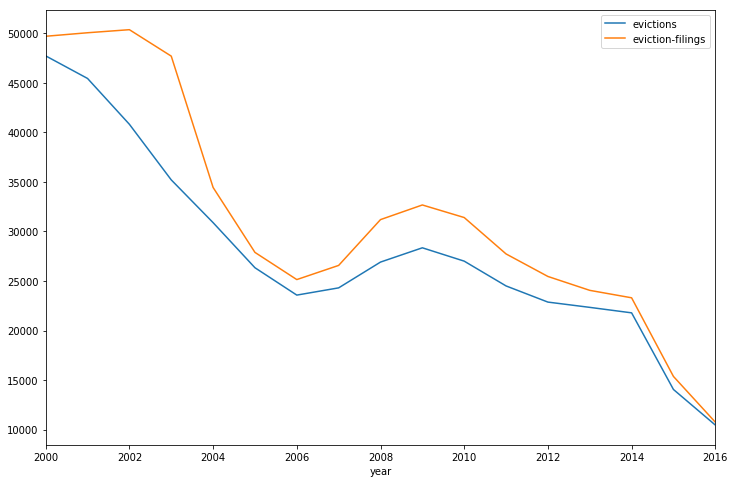

In [5]:
# Plot change in totals over time 
df.groupby(['year'])['evictions', 'eviction-filings'].sum().plot(figsize=(12, 8))

And the figure below visualizes how the average number evictions, eviction filings, eviction rate, and eviction filing rate change over time.

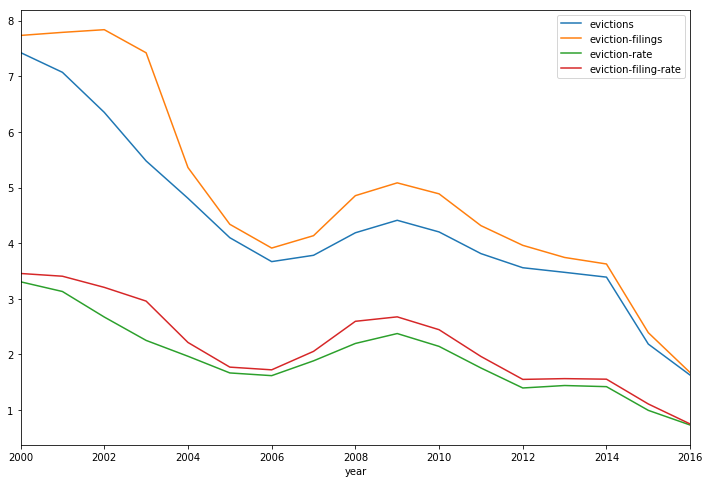

In [6]:
# Plot change in averages over time 
df.groupby(['year'])['evictions', 'eviction-filings', 'eviction-rate', 'eviction-filing-rate'].mean().plot(figsize=(12, 8))

The figures below show the correlation between evictions and eviction filings (on the left), along with the eviction and eviction filing rate (on the right).

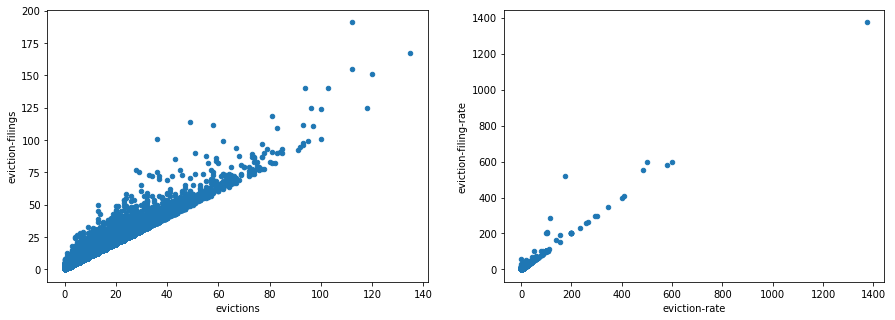

In [7]:
# Compare evictions to filings 
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(15,5))
df.plot.scatter(x='evictions', y='eviction-filings', ax=ax1)
df.plot.scatter(x='eviction-rate', y='eviction-filing-rate', ax=ax2)
plt.show()   

The scatterplots below show the relationship between some of the potential features to include in the models and the number of evictions (on the left), and the eviction rate (on the right). To allow for potential relationship to be more easily visualized, block groups with more than 100 evictions or block groups with an eviction rate of more than 50 aren't shown in their respective figures.

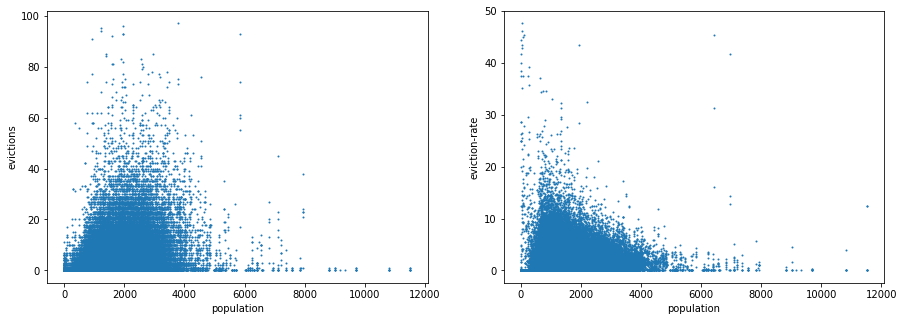

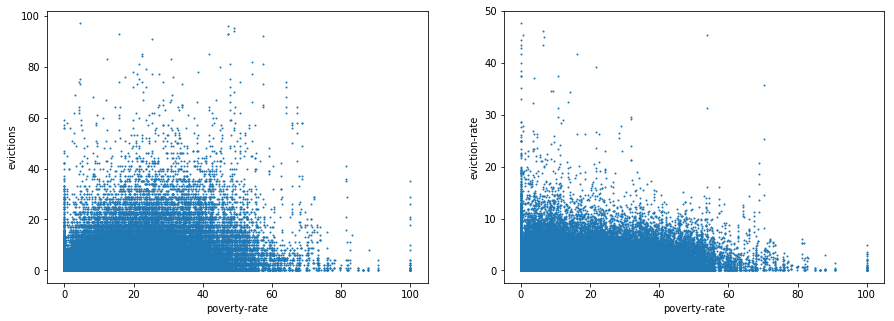

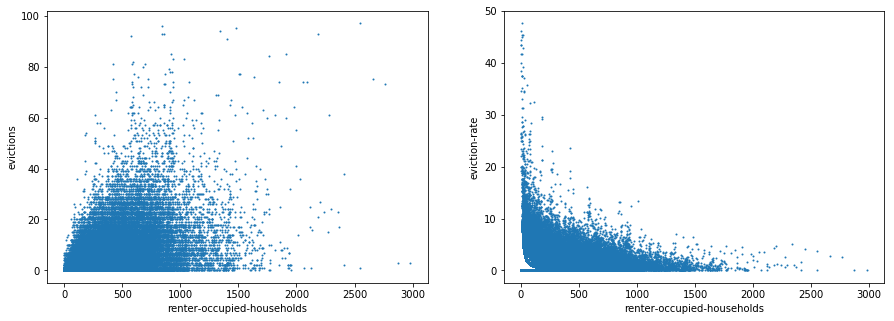

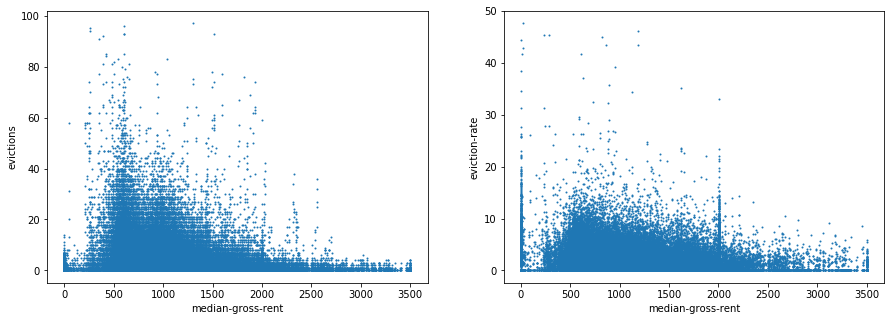

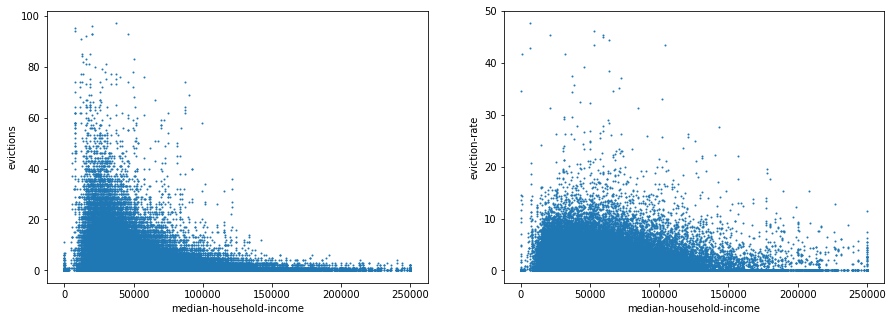

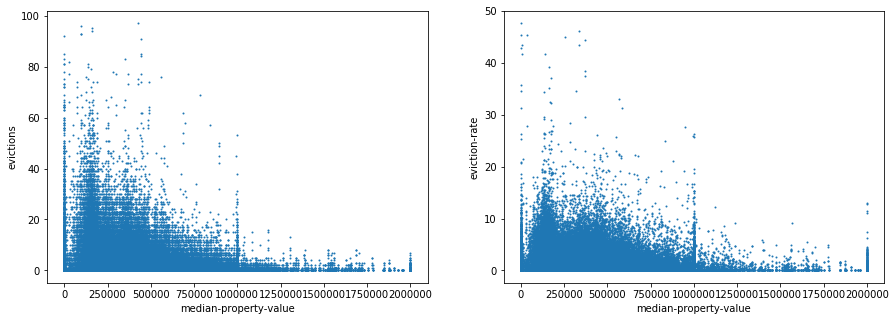

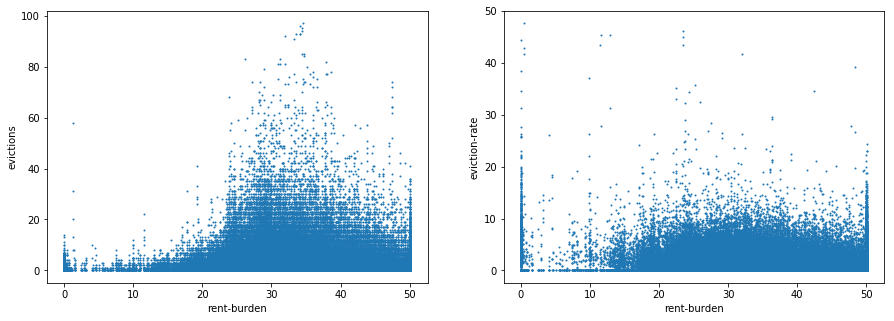

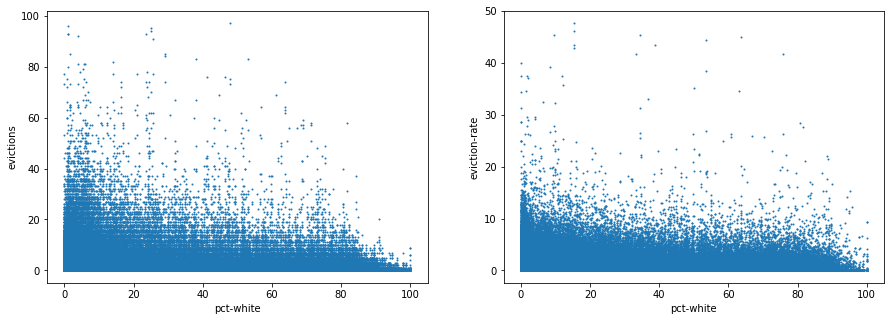

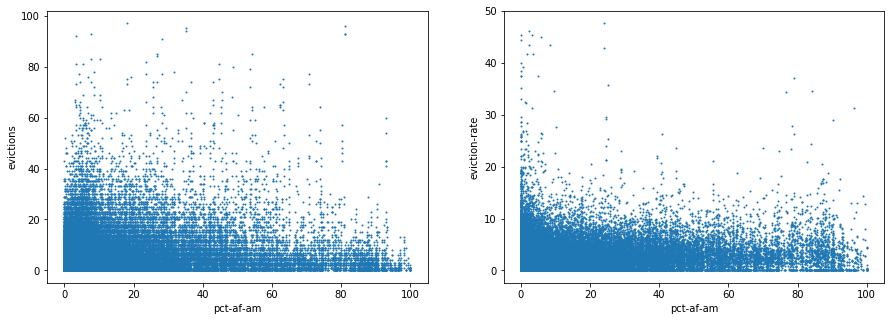

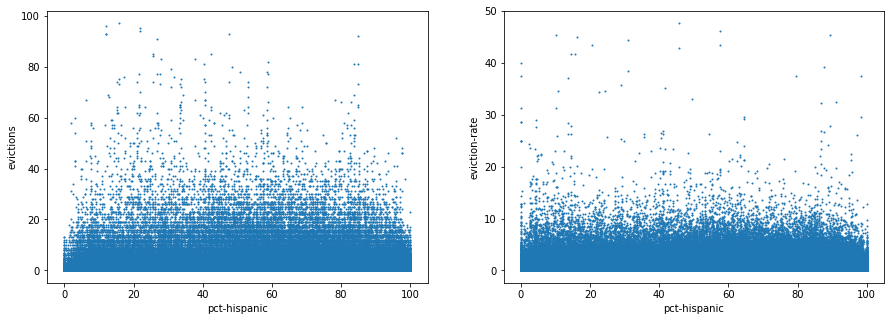

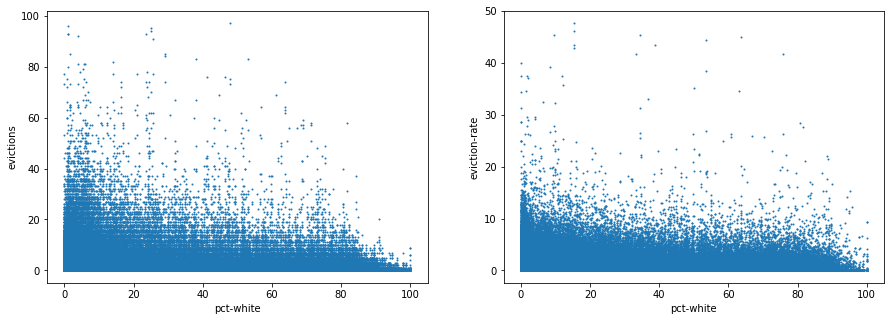

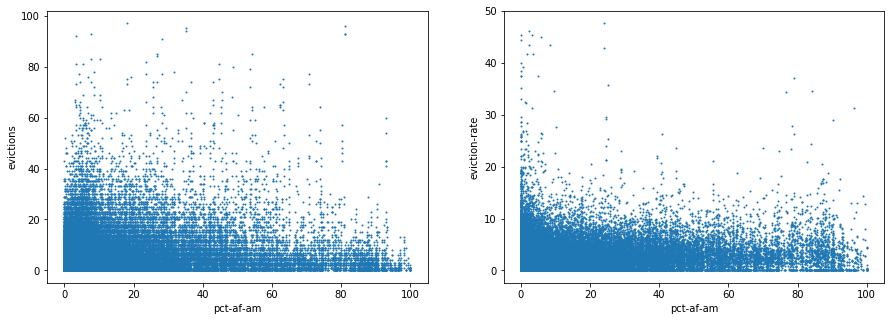

In [8]:
# Compare to features 
def create_scatter(feature): 
    fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(15,5))
    df[df['evictions']<100].plot.scatter(x=feature, y='evictions', ax=ax1, s=1)
    df[df['eviction-rate']<50].plot.scatter(x=feature, y='eviction-rate', ax=ax2, s=1)
    plt.show()    
    
create_scatter('population')
create_scatter('poverty-rate')
create_scatter('renter-occupied-households')
create_scatter('median-gross-rent')
create_scatter('median-household-income')
create_scatter('median-property-value')
create_scatter('rent-burden')
create_scatter('pct-white')
create_scatter('pct-af-am')
create_scatter('pct-hispanic')
create_scatter('pct-white')
create_scatter('pct-af-am')

## What analysis are you proposing to do?
The goal of this analysis is to predict eviction rates by block group. In a machine learing context, we're solving a regression problem where our target is the eviction rate for each block group. Separately, we're also interested in predicting the difference between the filing rate and the eviction rate. Given that our model must be appropriate for regression where the target is a continuous variable, we intend to apply the following types of methods:

- Simple linear regression
- Polynomial regression
- Support vector regression
- Decision tree regression
- Random forest regression